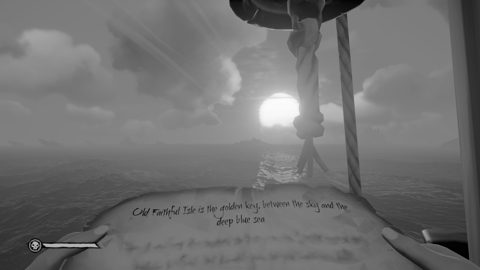

In [39]:
# Made by Prashant Shrivastava (I20MA052)  - Available on my GitHub (GazPrash)

import PIL
import numpy as np
import matplotlib.pyplot as plt

# loading image
image = PIL.Image.open("images/testsubj.png")
greyimg = PIL.ImageOps.grayscale(image)
greyimg = greyimg.resize((480, 270))

# low contrast greyscale image
greyimg

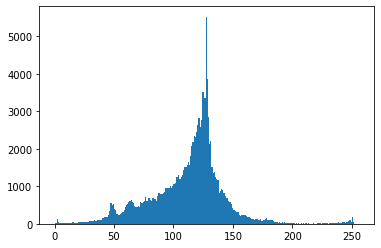

In [40]:
M, N = 480, 270

M*N  # 129600 pixels
greyimgmatrix = np.array(greyimg)
# ti = greyimgmatrix.reshape((480, 270))
plt.hist(x = greyimgmatrix.flatten(), bins = 256, range=[0, 256])
plt.show()

In [41]:
import pandas as pd

rk = np.arange(0, 256)
nk = pd.Series(greyimgmatrix.flatten())
nk = nk.value_counts().sort_index()

pk = nk/(M*N)

HistData = pd.DataFrame()
HistData["rk"] = rk
HistData["nk"] = nk
HistData["pk(rk)"] = pk

HistData.fillna(0, inplace=True)
HistData

,rk,nk,pk(rk)
0,0,31.0,0.000239
1,1,11.0,0.000085
2,2,126.0,0.000972
3,3,49.0,0.000378
4,4,34.0,0.000262
...,...,...,...
251,251,60.0,0.000463
252,252,1.0,0.000008
253,253,0.0,0.000000
254,254,0.0,0.000000


In [42]:
pk_cumsum = HistData["pk(rk)"].cumsum()

L = 256
EqTransformation = lambda x : np.round((L-1) * pk_cumsum.iloc[x])

In [43]:
sk = np.array([EqTransformation(i) for i in range(L)], dtype=int)
sk

array([  0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   4,
         4,   4,   4,   5,   5,   5,   6,   7,   8,   9,  10,  10,  11,
        12,  12,  13,  13,  14,  14,  15,  16,  17,  18,  19,  20,  21,
        23,  24,  25,  26,  26,  27,  28,  29,  30,  32,  33,  34,  35,
        37,  38,  39,  40,  42,  43,  44,  46,  47,  49,  50,  52,  53,
        55,  57,  59,  60,  62,  64,  66,  68,  70,  72,  74,  77,  79,
        82,  84,  87,  89,  92,  95,  98, 101, 104, 107, 111, 115, 119,
       124, 128, 133, 138, 144, 149, 155, 162, 168, 175, 186, 193, 199,
       203, 208, 211, 213, 216, 218, 221, 223, 225, 226, 228, 230, 232,
       233, 234, 236, 237, 238, 239, 240, 241, 242, 242, 243, 243, 244,
       244, 245, 245, 246, 246, 247, 247, 247, 248, 248, 248, 248, 248,
       249, 249, 249, 249, 250, 250, 250, 250, 250, 251, 251, 25

In [44]:
greyimgmatrix

array([[118, 118, 119, ...,  49,  50,  51],
       [118, 119, 119, ...,  48,  50,  51],
       [119, 119, 119, ...,  48,  50,  51],
       ...,
       [ 47,  47,  48, ...,  87,  89,  83],
       [ 48,  48,  48, ...,  84,  86,  89],
       [ 47,  46,  47, ...,  82,  84,  86]], dtype=uint8)

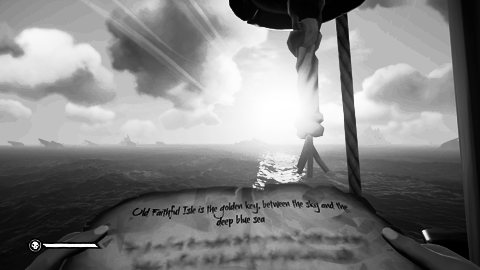

In [45]:
greyimgmatrix

for i, row in enumerate(greyimgmatrix):
    for j, col in enumerate(row):
        greyimgmatrix[i, j] = sk[col]


PIL.Image.fromarray(greyimgmatrix)
# Same image but it's an high contrast image

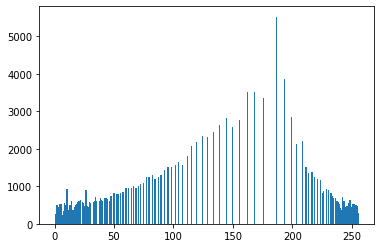

In [46]:
# Now plotting the histogram of equalized image
plt.hist(x = greyimgmatrix.flatten(), bins = 256, range=[0, 256])
plt.show()

# Equalized Histogram
# Made by Prashant Shrivastava (I20MA052)  - Available on my GitHub (GazPrash)